In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import erlang
from fractions import Fraction

# 1 Problem 5.23

In [2]:
M = 35
K = 7

In [3]:
#np.set_printoptions(formatter={'all':lambda x: str(Fraction(x).limit_denominator())})

In [4]:
mu = np.array([85,85,120,120,70,20,20])
L = np.empty(len(mu))
L.fill(M/K)
print(L)
print(mu)

[5. 5. 5. 5. 5. 5. 5.]
[ 85  85 120 120  70  20  20]


In [5]:
r_list = [[1/3,1/4,0,1/4,0,1/6,0],
          [1/3,1/4,0,1/4,1/6,0,0],
          [0,0,1/3,1/3,1/3,0,0],
          [1/3,0,1/3,0,1/3,0,0],
          [0,0,0,5/6,0,0,1/6],
          [1/6,1/6,1/6,1/6,1/6,1/6,0],
          [0,1/6,1/6,1/6,1/6,1/6,1/6]]
R = np.array(r_list)
print(R)

[[0.33333333 0.25       0.         0.25       0.         0.16666667
  0.        ]
 [0.33333333 0.25       0.         0.25       0.16666667 0.
  0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.        ]
 [0.33333333 0.         0.33333333 0.         0.33333333 0.
  0.        ]
 [0.         0.         0.         0.83333333 0.         0.
  0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.        ]
 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]]


In [6]:
#M=1
#K=3
#mu = np.array([2,1,3])
#L = np.empty(len(mu))
#L.fill(M/K)
#print(L)
#print(mu)
#r_list = [[0, 3/4, 1/4],[2/3, 0, 1/3],[1, 0 , 0]]
#R = np.array(r_list)
#print(R)

In [7]:
A = R.transpose()-np.eye(R.shape[0]) #solve for (R.T-I)v=0
# find the nullspace with eigenvectors
e_vals, e_vecs = np.linalg.eig(np.dot(A.T,A))
vec = e_vecs[:, np.argmin(e_vals)]
#v = vec / vec[1]
v = vec
#print(f'{[round(i,3) for i in v]}')
print(v)

[-0.45184706 -0.19246298 -0.37602045 -0.65788448 -0.40809761 -0.10669332
 -0.08161952]


In [8]:
M = 35
N = 50000
lam = 0
L = np.empty(len(mu))
L.fill(M/K)
#Bard–Schweitzer method
for i in range(N):
    #print(lam,L)
    lam = M/((((M-1)/M)*L+1)/mu*v).sum()
    L = v*lam*(((M-1)/M)*L+1)/mu
#print(f'{[round(i,3) for i in L]}',L.sum())
print(L, L.sum())

[ 5.62866706  0.57927309  1.02254541  7.00480267 13.10119789  5.76008552
  1.90342837] 35.0


In [9]:
M= 34
N = 50000
lam = 0
L = np.empty(len(mu))
L.fill(M/K)
#Bard–Schweitzer method
for i in range(N):
    #print(lam,L)
    lam = M/((((M-1)/M)*L+1)/mu*v).sum()
    L = v*lam*(((M-1)/M)*L+1)/mu
#print(f'{[round(i,3) for i in L]}',L.sum())
print(L,L.sum())

[ 5.5136788   0.57674531  1.01661964  6.83165873 12.53424694  5.64004393
  1.88700664] 33.99999999999999


In [10]:
W = (1+L) / mu 
print(f'{[round(i,3) for i in W]}')

[0.077, 0.019, 0.017, 0.065, 0.193, 0.332, 0.144]


# 2 Problem 5.24

In [15]:
M = 35
K = 7
L = np.zeros(K)
c = np.ones(K)
p = np.zeros([K,M])
#print(L,c,p)
for i in range(K):
    p[i][0]=1
#print(p)
for m in range(1,M+1):
    term = np.array([sum([c[i]-1-j*p[i][j] for j in range(int(c[i])-2+1)]) for i in range(K)])
    #print(term)
    W = 1/c/mu*(1+L+term)
    lam = v*(m/(v*W).sum())
    L = lam*W
    for i in range(K):
        for j in range(1,m):
            p[i][j]=lam[i]*p[i][j-1]/mu[i]/(j if j<=c[i] else c[i])
    #print(p)
#print(f'{[round(i,3) for i in L]}',L.sum())
print(L,L.sum())
print(W)
print(p)

[ 6.00029422  0.59198773  1.05732366  7.32638494 11.88587822  6.1316778
  2.00645344] 35.00000000000001
[0.0807347  0.01870013 0.01709526 0.06770476 0.17707055 0.34939866
 0.14945628]
[[1.00000000e+00 8.74366297e-01 7.64516421e-01 6.68467392e-01
  5.84485358e-01 5.11054298e-01 4.46848655e-01 3.90709403e-01
  3.41623134e-01 2.98703755e-01 2.61176496e-01 2.28363926e-01
  1.99673720e-01 1.74587971e-01 1.52653838e-01 1.33475371e-01
  1.16706366e-01 1.02044113e-01 8.92239332e-02 7.80144000e-02
  6.82131621e-02 5.96432899e-02 5.21500825e-02 4.55982746e-02
  3.98695945e-02 3.48606297e-02 3.04809597e-02 2.66515239e-02
  2.33031942e-02 2.03755276e-02 1.78156747e-02 1.55774255e-02
  1.36203758e-02 1.19091976e-02 1.04130010e-02]
 [1.00000000e+00 3.72433865e-01 1.38706984e-01 5.16591780e-02
  1.92396273e-02 7.16548875e-03 2.66867067e-03 9.93903331e-04
  3.70163259e-04 1.37861333e-04 5.13442290e-05 1.91223297e-05
  7.12180314e-06 2.65240067e-06 9.87843831e-07 3.67906496e-07
  1.37020838e-07 5.10312

In [38]:
p[:,1].sum()

5.171607037229523

In [44]:
p.T

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.74366297e-01, 3.72433865e-01, 5.15407924e-01, 9.01756471e-01,
        9.58929961e-01, 8.77461547e-01, 6.71250973e-01],
       [7.64516421e-01, 1.38706984e-01, 2.65645328e-01, 8.13164733e-01,
        9.19546670e-01, 7.69938766e-01, 4.50577868e-01],
       [6.68467392e-01, 5.16591780e-02, 1.36915707e-01, 7.33276560e-01,
        8.81780853e-01, 6.75591661e-01, 3.02450832e-01],
       [5.84485358e-01, 1.92396273e-02, 7.05674402e-02, 6.61236883e-01,
        8.45566079e-01, 5.92805704e-01, 2.03020415e-01],
       [5.11054298e-01, 7.16548875e-03, 3.63710179e-02, 5.96274638e-01,
        8.10838647e-01, 5.20164210e-01, 1.36277651e-01],
       [4.46848655e-01, 2.66867067e-03, 1.87459108e-02, 5.37694513e-01,
        7.77537472e-01, 4.56424093e-01, 9.14765060e-02],
       [3.90709403e-01, 9.93903331e-04, 9.66179097e-03, 4.84869507e-01,
        7.45603978e-01, 4

In [13]:
M = 34
K = 7
L = np.zeros(K)
c = np.ones(K)
p = np.zeros([K,M])
#print(L,c,p)
for i in range(K):
    p[i][0]=1
#print(p)
for m in range(1,M+1):
    term = np.array([sum([c[i]-1-j*p[i][j] for j in range(int(c[i])-2+1)]) for i in range(K)])
    #print(term)
    W = 1/c/mu*(1+L+term)
    lam = v*(m/(v*W).sum())
    L = lam*W
    for i in range(K):
        for j in range(1,m):
            p[i][j]=lam[i]*p[i][j-1]/mu[i]/(j if j<=c[i] else c[i])
    #print(p)
#print(f'{[round(i,3) for i in L]}',L.sum())
print(L,L.sum())
print(W)
#print(p)

[ 5.86244911  0.58951101  1.05143074  7.12457152 11.39493884  5.98797323
  1.98912555] 34.00000000000001
[0.07907982 0.01866907 0.01704305 0.06600657 0.17018686 0.3420745
 0.14854096]


In [14]:
W = (1+L) / mu 
print(f'{[round(i,3) for i in W]}')

[0.081, 0.019, 0.017, 0.068, 0.177, 0.349, 0.149]


# 3 Problem 4.4

## 3 (a)

In [13]:
lam = Fraction(6,60)
X_mean = Fraction(5)
mu = Fraction(2,3)
rho = lam*X_mean/mu
print(lam, X_mean, mu, rho)

1/10 5 2/3 3/4


In [14]:
L = rho+(lam/mu*30)/2/(1-rho)
print(L)

39/4


In [15]:
L.numerator/L.denominator

9.75

In [16]:
W = L / lam / X_mean
print(W)

39/2


In [17]:
W.numerator/W.denominator

19.5

## 3 (b)

In [18]:
lam = Fraction(1,2)
mu = Fraction(2,3)
rho = lam / mu
print(lam, mu, rho)

1/2 2/3 3/4


In [19]:
L = rho/(1-rho)
print(L)

3


In [20]:
W = L/lam
print(W)

6


In [21]:
1/(mu-lam)

Fraction(6, 1)

# 4 Problem 4.22

In [22]:
mu_samp = np.array([4.00, 1.44, 4.44, 1.74, 1.16, 4.20, 3.59, 2.14, 3.54, 2.56, 5.53, 2.02, 3.06, 1.66,
3.23, 4.84, 7.99, 3.07, 1.24, 3.40, 5.01, 2.78, 1.62, 5.19, 5.09, 3.78, 1.52, 3.94, 1.96, 6.20,
3.67, 3.37, 1.84, 1.60, 1.31, 5.64, 0.99, 3.06, 1.24, 3.11, 4.57, 0.90, 2.78, 1.64, 2.43, 5.26,
2.11, 4.27, 3.36, 4.76])

In [23]:
np.mean(mu_samp)

3.1970000000000005

In [24]:
np.var(mu_samp)

2.463673

In [25]:
4/1.25

3.2

In [26]:
4/1.25/1.25

2.56

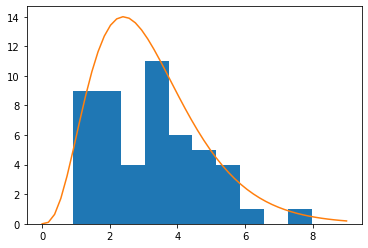

In [27]:
plt.hist(mu_samp,10)
x = np.linspace(0,9)
plt.plot(x, 50*erlang.pdf(x=x, a=4, scale=1/1.25))

In [28]:
erlang.pdf(x, 4, 1/1.25)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00024555, 0.00339524, 0.01175028, 0.02559591, 0.0440869 ,
       0.06585723, 0.08940206, 0.11330287, 0.13634714, 0.15757889,
       0.17630597, 0.19208168, 0.20467298, 0.21402301, 0.22021313,
       0.22342747, 0.22392144, 0.22199508, 0.21797132, 0.21217875,
       0.20493865, 0.19655551, 0.18731068, 0.17745837, 0.16722372,
       0.15680225, 0.14636055, 0.13603769, 0.12594719, 0.11617932,
       0.10680357, 0.09787112, 0.08941731, 0.08146395, 0.07402149,
       0.06709099, 0.06066591, 0.05473367, 0.04927705, 0.04427537,
       0.03970547, 0.03554264, 0.03176124, 0.02833535, 0.0252392 ])

In [29]:
k = Fraction(4)
mu = Fraction(5,16)
lam = Fraction(18,60)
rho = lam / mu
print(k, mu, lam, rho)

4 5/16 3/10 24/25


In [30]:
L_q = (1+1/k)/2*rho*rho/(1-rho)
W_q = L_q / lam
print(L_q, W_q)

72/5 48
